In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
os.listdir()

['.config', 'sample_data']

In [ ]:
# path = r'C:\Users\PC\Desktop\proj_data\2-Time Series Data Analysis\individual_stocks_5yr'
# r is added before path name to convert the path name into raw string
path  =r'/content/drive/MyDrive/Stock EDA/'

company_list =['AAPL_data.xls', 'GOOG_data.xls', 'MSFT_data.xls', 'AMZN_data.xls']
all_data = pd.DataFrame()
for file in company_list:
    new_path = path+file
    current_df = pd.read_csv(new_path)
    all_data = pd.concat([all_data,current_df])
all_data.shape

(4752, 7)

In [ ]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [ ]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [ ]:
# to convert date from object to Datetime
all_data['date'] = pd.to_datetime(all_data['date'])

In [ ]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [ ]:
tech_list = all_data["Name"].unique()
tech_list

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

## analyzing closing price of stocks & volume trading

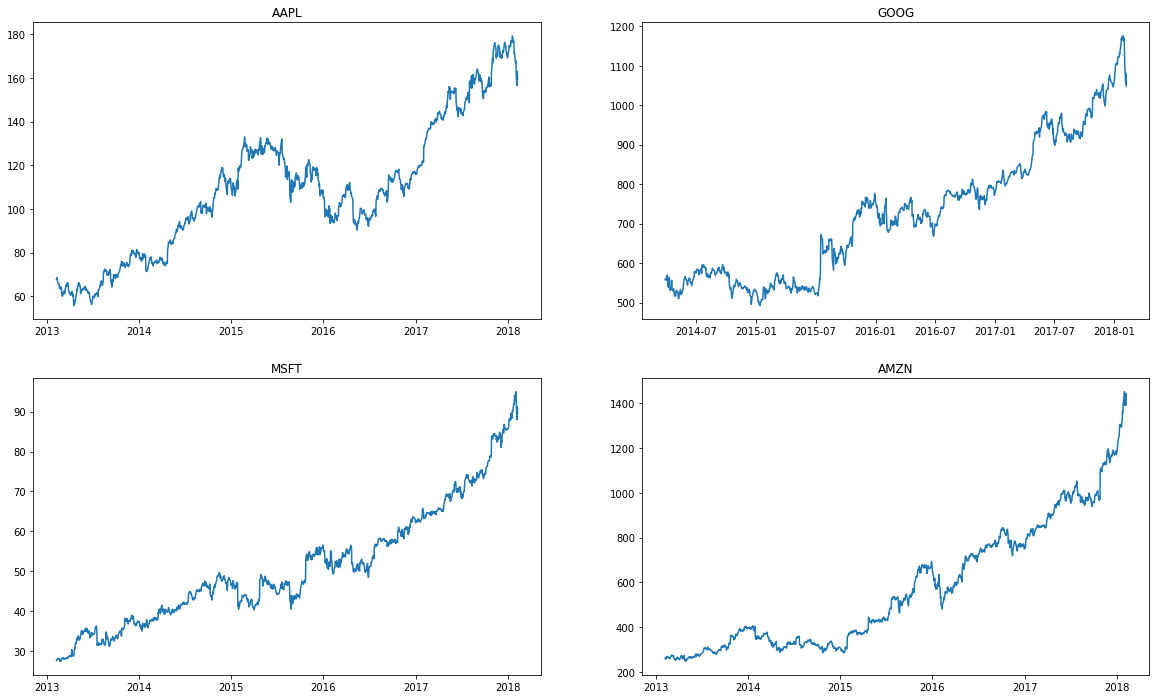

In [ ]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data["Name"]==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

In [ ]:
import plotly.express as px

In [ ]:
apple = all_data[all_data["Name"]=='AAPL']
fig = px.line(apple,x='date', y='volume',title ='Apple Inc')
fig.show()

In [ ]:
for company in tech_list:
    df = all_data[all_data["Name"]==company]
    fig = px.line(df,x='date', y='volume',title =company)
    fig.show()

## analyzing daily returns

 ##### Daily Stock Return Formula
    To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then,
    multiply the result by the number of shares you own in the company. 

In [ ]:
df2 = pd.read_csv(path+'AAPL_data.xls')
df2.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [ ]:
df2['daily_change'] = df2['close']- df2['open']
df2.head()

NameError: ignored

In [ ]:
df2['daily % return'] = ((df2['close']- df2['open'])/df2['open'])*100
df2.head()

In [ ]:
fig = px.line(df2,x= 'date',y ='daily % return',title = 'APPLE')
fig.show()

In [ ]:
df3 = df2.copy()
df3.head()

In [ ]:
df3.dtypes

In [ ]:
df3['date'] = pd.to_datetime(df3['date'])

In [ ]:
df3.set_index('date', inplace=True)
df3.head()

In [ ]:
df3['2013-04-01': '2013-04-15']

In [ ]:
df3['close'].resample('M').mean().head()
# mean of stock price for each month

In [ ]:
df3['close'].resample('15D').mean().head()
# mean of stock price for 15 days

In [ ]:
plt.figure(figsize=(8,6))
df3['close'].resample('15D').mean().plot()
# plot of mean of closing price of stocks over 15 day period

In [ ]:
plt.figure(figsize=(8,6))
df3['close'].resample('3M').mean().plot(kind = 'bar')

## multi variate analysis

analysing daily return of each stock and how they are correlated

value at risk analysis for tech companies

In [ ]:
aapl = pd.read_csv(path+'AAPL_data.xls')
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [ ]:
amzn = pd.read_csv(path+'AMZN_data.xls')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [ ]:
goog=pd.read_csv(path+'GOOG_data.xls')
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [ ]:
msft = pd.read_csv(path+'MSFT_data.xls')
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [ ]:
close = pd.DataFrame()
close['apple']= aapl['close']
close['amzn'] = amzn['close']
close['google']= goog['close']
close['msft'] = msft['close']
close.head()

,apple,amzn,google,msft
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


<Figure size 1440x1080 with 0 Axes>

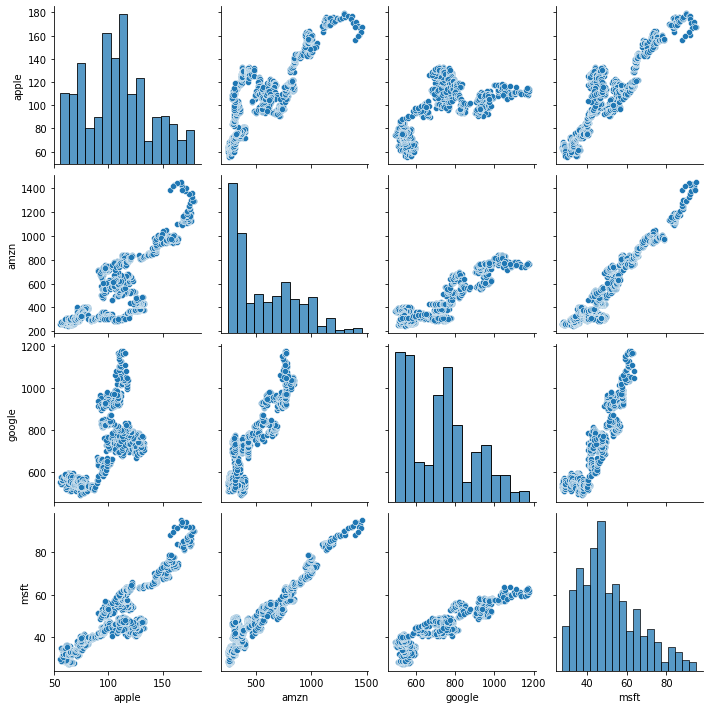

In [ ]:
plt.figure(figsize=(20,15))
sns.pairplot(data = close)

(4.5, -0.5)

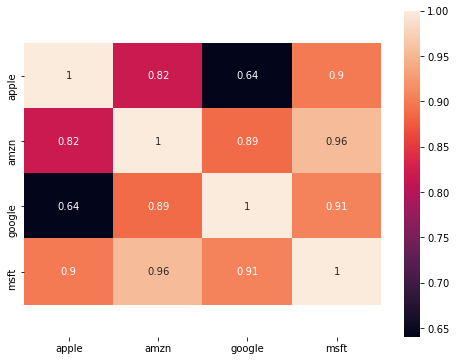

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(close.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
# daily stock price change percentage
# percent close change / Daily return %

In [ ]:
change_data= pd.DataFrame()
change_data['apple']=((aapl['close']- aapl['open'])/aapl['close'])*100
change_data['goog']=((goog['close']-goog['open'])/goog['close'])*100
change_data['amzn']=((amzn['close']-amzn['open'])/amzn['close'])*100
change_data['msft']=((msft['close']-msft['open'])/msft['close'])*100
change_data.head()

,apple,goog,amzn,msft
0,0.206325,-1.708269,0.209964,0.725953
1,0.714688,-0.216075,-2.328836,0.753769
2,-2.481344,-1.781065,-0.189409,0.000000
3,-0.042869,1.489879,2.946525,0.356761
4,0.443624,0.334039,0.694548,0.427960


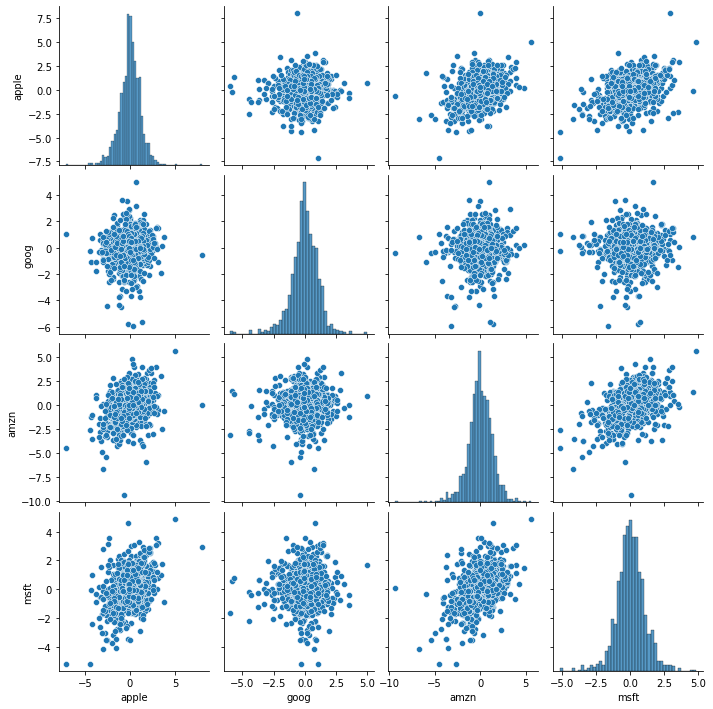

In [ ]:
sns.pairplot(data = change_data)

(4.5, -0.5)

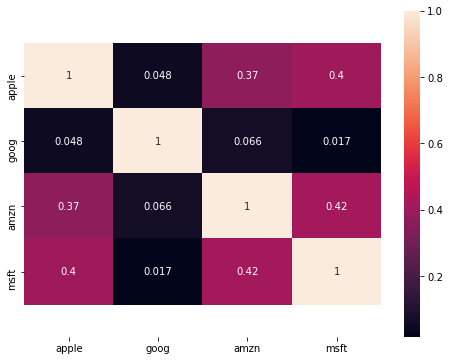

In [ ]:
plt.figure(figsize=(8,6))
ax2 = sns.heatmap(change_data.corr(),annot = True)
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)

C:\Users\91727\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='apple', ylabel='Density'>

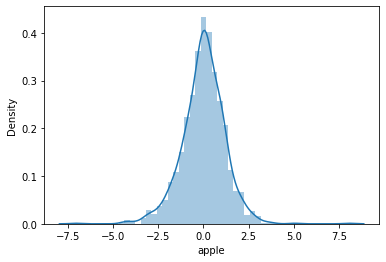

In [ ]:
sns.distplot(change_data['apple'])

distplot follows almost normal distribution

In [ ]:
print(change_data['apple'].std()) #68% of data
print(2*change_data['apple'].std()) # 95% of data
print(3*change_data['apple'].std()) # 99.7% of data

1.1871377131421237
2.3742754262842474
3.561413139426371


In [ ]:
print(change_data['goog'].std())
print(2*change_data['goog'].std())
print(3*change_data['goog'].std())

1.0925596178210477
2.1851192356420954
3.277678853463143


In [ ]:
print(change_data['amzn'].std())
print(2*change_data['amzn'].std())
print(3*change_data['amzn'].std())

1.35867860994955
2.7173572198991
4.07603582984865


In [ ]:
print(change_data['msft'].std())
print(2*change_data['msft'].std())
print(3*change_data['msft'].std())

1.059259601884536
2.118519203769072
3.177778805653608


In [ ]:
change_data['apple'].quantile(0.1)
# 90% cases worst daily loss will not exceed this percentage

-1.4246644227944307

In [ ]:
change_data.describe().T

,count,mean,std,min,25%,50%,75%,max
apple,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
